# "Monte Carlo Integration in Python"


- toc: true
- branch: master
- badges: true
- comments: true
- author: Kim Jeewoo
- categories: [Python]
- image: images/monte_logo.gif

# 몬테 카를로 적분(Monte Carlo Integration)

# Problem 

**Find $\int_0^1 (x + sin(\pi x))\,dx$.**

## Solution I - Analytic Sol

$\int_0^1 (x + sin(\pi x))\,dx = \left[\cfrac{1}{2} x^2-\cfrac{1}{\pi}cos(\pi x)\right]_0^1 = \cfrac{1}{2} + \cfrac{1}{\pi} + \cfrac{1}{\pi} = \cfrac{1}{2}+\cfrac{2}{\pi}$

## Solution II - Monte Carlo Integration in Python

In [79]:
import numpy as np
import matplotlib.pyplot as plt

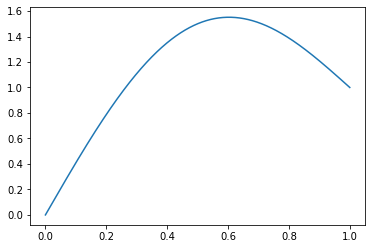

In [97]:
def function(x):
    return x + np.sin(np.pi*x)

x = np.linspace(0, 1, 10000)
y = [function(x) for x in x]
plt.plot(x, y)

![](image/monte_1.png)

![](image/monte_2.png)

In [145]:
def function(x): #함수 정의
    return x + np.sin(np.pi*x)

N = int(10000)  # Random Sampling 시행 횟수

W = 1  # 사각형의 가로 길이
H = 1.6  #사각형의 세로 길이

X = np.random.random(N)   # 0~1까지의 x 좌표 Random Sampling을 N번 시행
Y = H * np.random.random(N) # 그래프상 최솟값 ~ 최댓값까지의 y 좌표 Randon Sampling을 N번 시행
F = function(X) # Random Sampling으로 구한 X값에 따른 함숫값

in_or_out = Y < F  # Y < F (IN)이면 True, Y > F (OUT)이면 False
A = H * W * np.sum(in_or_out) / N # 영역 S의 넓이

A

1.1411200000000001

### Visualization

In [155]:
color = list(map(lambda x: 'blue' if x else 'red', in_or_out)) #색 정하기
color = np.where(in_or_out, True, blue)
color =
               
plt.scatter(X, Y, color=color, s=5, label='A = {}'.format(np.round(1, 4)))
               ### 샘플링 포인트 그리기 
               
plt.plot([0, W], [0, 0], color='black')  ### 사각형 영역 그리기
plt.plot([W, W], [0, H], color='black')
plt.plot([0, W], [H, H], color='black')
plt.plot([0, 0], [0, H], color='black')

px = np.linspace(0, W, 1000)
py = function(px)
plt.plot(px, py, color = 'black') ### 함수 y = f(x) 그리기

plt.legend(loc = 'lower right') ### 그래프 그리는 옵션 추가
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'da'

In [156]:
?np.where

Docstring:
where(condition, [x, y])

Return elements chosen from `x` or `y` depending on `condition`.

.. note::
    When only `condition` is provided, this function is a shorthand for
    ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
    preferred, as it behaves correctly for subclasses. The rest of this
    documentation covers only the case where all three arguments are
    provided.

Parameters
----------
condition : array_like, bool
    Where True, yield `x`, otherwise yield `y`.
x, y : array_like
    Values from which to choose. `x`, `y` and `condition` need to be
    broadcastable to some shape.

Returns
-------
out : ndarray
    An array with elements from `x` where `condition` is True, and elements
    from `y` elsewhere.

See Also
--------
choose
nonzero : The function that is called when x and y are omitted

Notes
-----
If all the arrays are 1-D, `where` is equivalent to::

    [xv if c else yv
     for c, xv, yv in zip(condition, x, y)]

Examples
-